*NonLinearity.ipynb*
> 06/11/2019
>
> This Notebook is derived from NonLinearity.ipynb.
> The purpose here is just to generate a plot to illustrate a technical note

In [1]:
import numpy as np
import matplotlib.pyplot as plt# Imports

In [2]:
def non_linearity(x):
    """
    This function apply a non linearity to a 2D array
    This non linearity function is the one characterized by Damien on the WFEE amplifiers
    """
    return(1/((1+(x/75)**2)*(1+(x/2.7)**6)))

def quantization(x, nbits):
    """
    This function applies a nbits quantization to a 2D array
    """
    FSR=2*np.abs(x).max()
    return(((x/FSR)*2**nbits).astype(int))*FSR/2**nbits
    

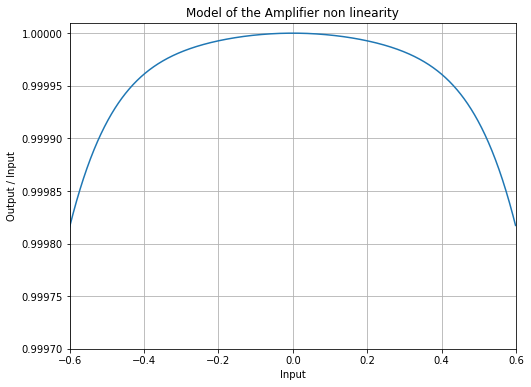

In [3]:
# Checking the shape of the non linearity function
def check_nl_model():
    npts=2**10
    input_range=1.2
    x=input_range*(np.arange(npts)-npts/2)/npts
    y=non_linearity(x)

    fig=plt.figure(1,(8,6))
    ax=fig.add_subplot(1,1,1)
    ax.plot(x, y)
    ax.axis([-0.6, 0.6, 0.9997, 1.00001])
    ax.set_title('Model of the Amplifier non linearity')
    ax.set_xlabel('Input')
    ax.set_ylabel('Output / Input')
    ax.grid()
check_nl_model()

In [28]:
def plot_signal(freq, sig_t, fzoom, title):
    npts=len(sig_t)
    sig_f=20*np.log10(np.abs(np.fft.fft(sig_t*np.blackman(npts)))[1:int(npts/2)])
    sig_f-=sig_f.max()

    fig=plt.figure(figsize=(8,10))
    #ax1=fig.add_subplot(3,1,1)
    #ax1.plot(sig_t)
    #ax1.axis([0, 300, -1.1, 1.1])
    #ax1.set_title(title)
    #ax1.set_xlabel('Samples')
    #ax1.set_ylabel('Amplitude')
    #ax1.text(10, 1, 'Peak-Peak = {0:6.2f}'.format(sig.max()-sig.min()))

    ax2=fig.add_subplot(2,1,1)
    ax2.plot(freq/1e6, sig_f)
    ax2.set_xlabel('Frequency (MHz)')
    ax2.set_ylabel('Amplitude (dBc)')
    ax2.set_title(title)
    ax2.axis([0.8, 5.2, -230, 10])
    ax2.grid()    

    ax3=fig.add_subplot(2,1,2)
    ax3.plot(freq/1e6, sig_f)
    ax3.set_xlabel('Frequency (MHz)')
    ax3.set_ylabel('Amplitude (dBc)')
    delta=5e3
    ax3.axis([(fzoom-delta)/1e6, (fzoom+delta)/1e6, -230, 10])
    ax3.grid()
    
    for item in ([ax2.xaxis.label, ax2.yaxis.label, ax3.xaxis.label, ax3.yaxis.label]):
        item.set_fontsize(14)
    for item in ([ax2.title]):
        item.set_weight('bold')
        item.set_fontsize(15)

    fig.tight_layout()


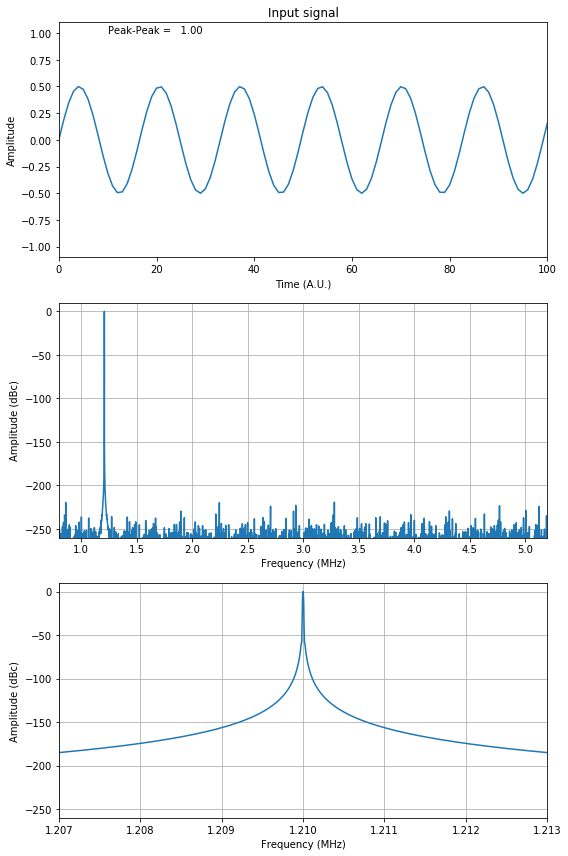

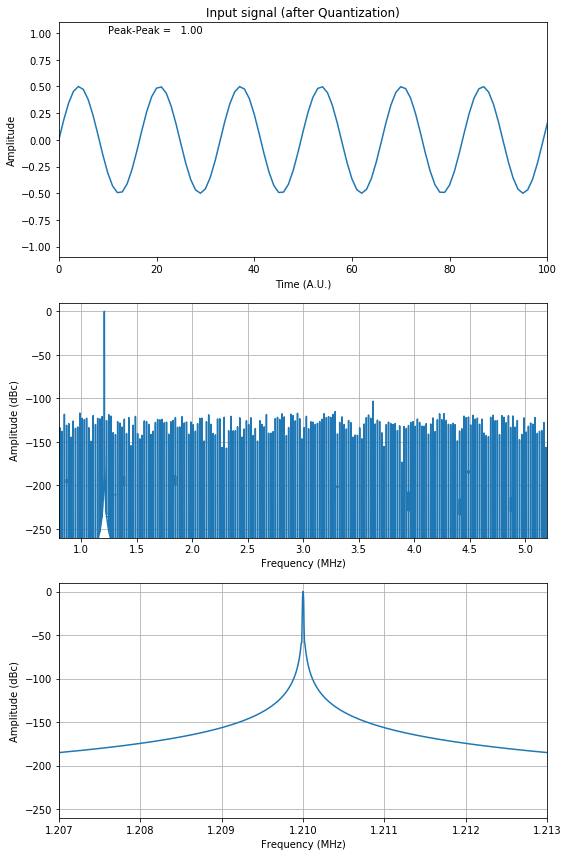

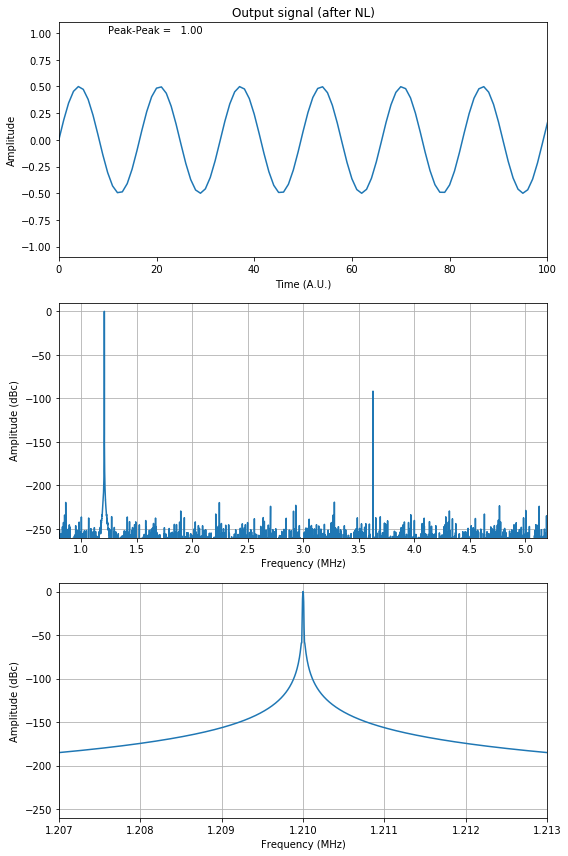

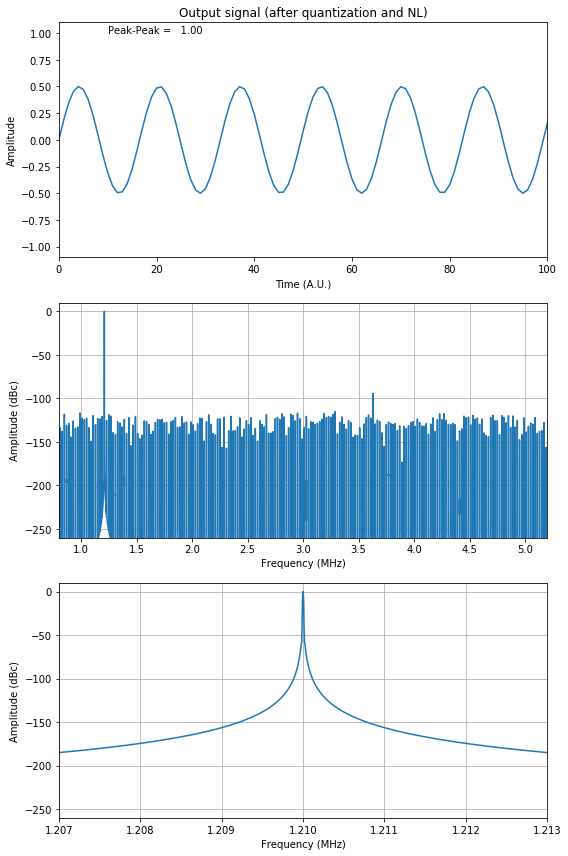

In [8]:
# Analysis for a single tone signal
npts=2**22
fs=20e6
fsig=1.21e6
t=np.arange(npts)/fs
freq=(1+np.arange(int(npts/2)-1))*fs/npts
amplitude=0.5
sig=amplitude*np.sin(2*np.pi*fsig*t)
plot_signal(freq, sig, fsig, 'Input signal')

sig_quant=quantization(sig, 16)
plot_signal(freq, sig_quant, fsig, 'Input signal (after Quantization)')

sig_nl=sig*non_linearity(sig)
plot_signal(freq, sig_nl, fsig, 'Output signal (after NL)')

sig_quant_nl=sig_quant*non_linearity(sig_quant)
plot_signal(freq, sig_quant_nl, fsig, 'Output signal (after quantization and NL)')


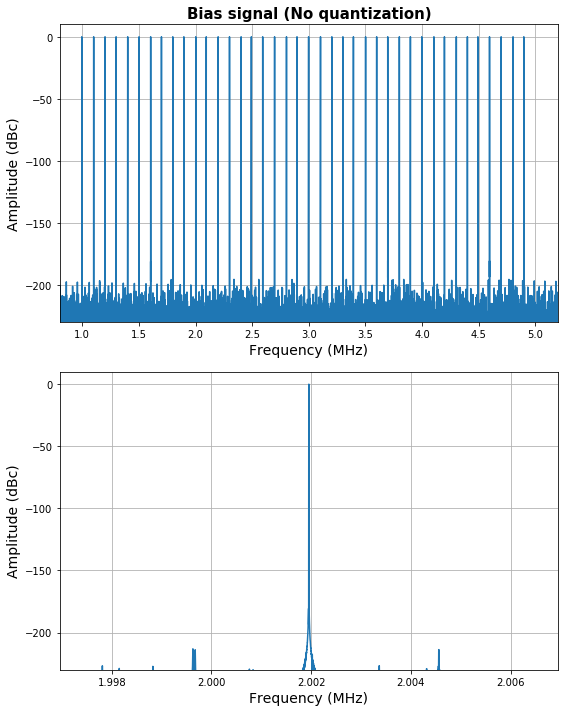

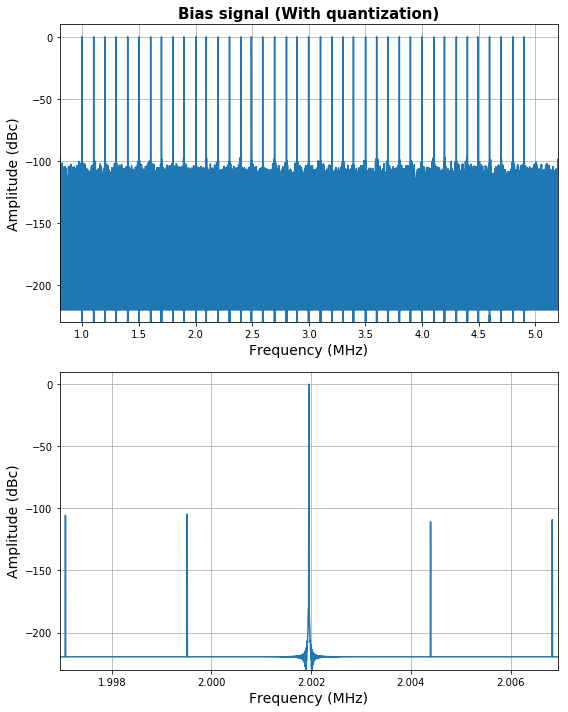

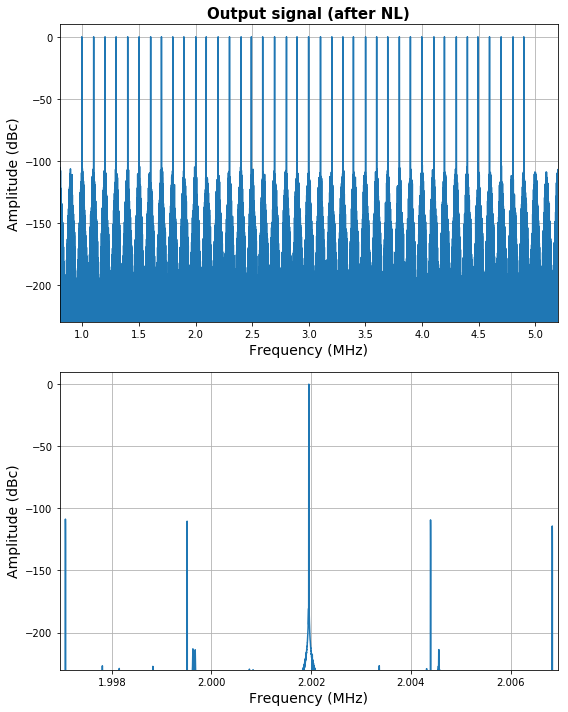

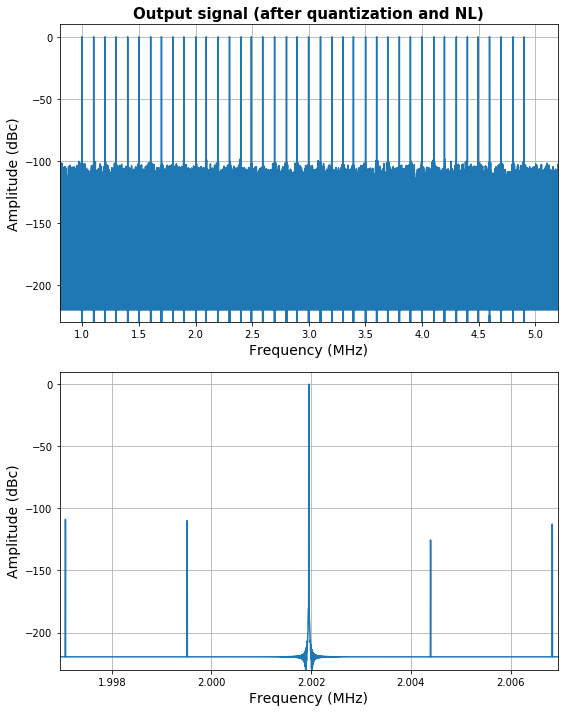

In [30]:
# Analysis for a multi tone signal
npts=2**24
fs=20e6
t=np.arange(npts)/fs
# vecteur de frequences pour les plots
freq=(1+np.arange(int(npts/2)-1))*fs/npts
amplitude=0.5
npix=40
fstep=100e3
f0=1e6
fsigma=3e3
fsig=(f0+np.arange(npix)*fstep)+np.random.normal(0, fsigma, npix)

# quantification des fréquences
fgrid=20e6/2**13  # 2.4kHz
fsig=fgrid*(fsig//fgrid)

# Phasage aléatoire des sinusoides pour optimiser le facteur de crete
phi=np.random.uniform(0, 2*np.pi, npix)

# calcul de la somme des sinusoides
sig=np.zeros(npts)
for pix in range(npix):
    sig+=np.sin(2*np.pi*fsig[pix]*t+phi[pix])
# Ajustement de l'amplitude
sig=amplitude*sig/sig.max()
plot_signal(freq, sig, fsig[10], 'Bias signal (No quantization)')

sig_quant=quantization(sig, 16)
plot_signal(freq, sig_quant, fsig[10], 'Bias signal (With quantization)')

sig_nl=sig*non_linearity(sig)
plot_signal(freq, sig_nl, fsig[10], 'Output signal (after NL)')

sig_quant_nl=sig_quant*non_linearity(sig_quant)
plot_signal(freq, sig_quant_nl, fsig[10], 'Output signal (after quantization and NL)')

